# Diseño de parámetros robustos

## 12-1 Enfoque del diseño de parámetros robustos



### 1. ¿Qué es el diseño de parámetros?

El diseño de parámetros es un método de diseño que evalúa la funcionalidad frente al ruido, minimiza los efectos del ruido tanto como sea posible y determina los valores de los parámetros del sistema para lograr la función deseada.

* Método central del enfoque Taguchi
* Ingeniería de calidad

### 2. Diferencias entre el diseño de parámetros y el diseño de experimentos

En el diseño de experimentos, se realiza una prueba estadística para identificar los factores que afectan los valores de las características y se ajustan los niveles de los factores para cumplir con los objetivos (valores). Por otro lado, el diseño de parámetros, que se desarrolló a partir del diseño de experimentos, no se enfoca en las pruebas estadísticas, sino que se centra en encontrar los parámetros de diseño que alteran la variabilidad de las características frente al ruido y establecer los valores de los parámetros que minimizan esa variabilidad.

* Se ignoran intencionadamente las interacciones entre los factores de control.
* La relación S/N (SN ratio) es la proporción entre la magnitud del efecto de la señal y la magnitud del efecto del ruido dentro de la variabilidad de las características, y es un valor que indica la magnitud del impacto del ruido en el producto o el proceso.

### 3. Efectos del uso del diseño de parámetros

Será posible lograr la reducción de costos en diversas aspectos.

### 4. Enfoque del diseño de parámetoros

Se llama robustez de la relación de entrada y salida al grado de resistencia frente al ruido en la relación entre entrada y salida.

### 5. Enfoque de la función básica y función ideal en el diseño de parámetros

Función objetivo: Se refiere a las funciones y rendimientos requeridos por los técnicos o usuarios, y siempre tiene un valor objetivo.

Función básica: Se refiere a los principios naturales, fenómenos o las propiedades de los materiales que los técnicos utilizan para lograr el valor objetivo de la función objetivo.

Función ideal: Se refiere a la relación ideal entre la entrada y la salida.

### 6. Factores utilizados en el diseño de parámetros

(1) Factor de error (ruido)
* Disturbancia externa: Ruido que proviene del exterior
* Disturbancia interna: Ruido generado internamente
* Variabilidad entre productos: Variabilidad en las piezas o materiales utilizados

(2) Factor de señal (ruido)

(3) Factor de control



In [1]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import f

## 12-02 Diseño de parámetros de características estáticas

### 1. Diseño de parámetros de características estáticas

Las características estáticas se refieren a aquellos casos en los que la entrada del sistema se mantiene fija y el valor objetivo para la salida es constante y no cambia. Dentro de estas, se llama "característica deseada" a aquella cuyo objetivo es un valor constante positivo.
* Característica deseada
* Característica de mínimo deseado
* Característica de máximo deseado

### 2. Procedimiento para el diseño de parámetros de características estáticas

Paso 1: Establecimiento del método de evaluación de los factores de error y la variabilidad (dispersión) de la salida.

Paso 2: Establecimiento de los niveles de los factores de control (parámetros de diseño) y la disposición del experimento.

* Tabla ortogonal del sistema mezclado L18.
* Asignar el factor de error de mezcla N al exterior.

Paso 3: Cuantificación de la variabilidad de la salida y cálculo de la relación S/N.

* Variabilidad de salida
* En el método Taguchi, el inverso de esta variable de salida se llama la relación S/N de la característica deseada, y un valor mayor indica mayor resistencia al ruido.

* Relación S/N de la característica deseaba (valor en decibelios)

$ \hat{\eta} = 10 log(\frac{\hat{\mu}}{\hat{\sigma}})^2 $

Paso 4: Comprensión de los efectos de los factores.

* Cuanto mayor sea el factor que cambie significativamente la relación S/N, mayor será la resistencia al ruido, y cuanto mayor sea el factor que cambie significativamente  el promedio de salida, mejor se controlará la salida.

Paso 5: Optimización.

* Factor que cambia significativamente la relación S/N
* Factor que cambia significativamente el promedio de salida sin alterar significativamente la relación S/N.
* Diseño de dos etapas

Paso 6: Verificación de la reproducibilidad.


## 12.1

スイッチを入れると一定量のお湯が一定時間で沸く電気ポットを開発している。使用環境温度や水温、部品の経年変化などによって、お湯が沸く時間がばらつかないように設計したい。そこで、設計パラメータ６因子（A、B、C、D、F、G）にたいして $ L_{18} $ 混合系直交表を用いて、パラメータ設計を行うことにした。取り上げた誤差因子は、出力が小さくなる前と大きくなる側の $ N_1, N_2 $ に調合し、実験を行い、データを得た。
1. 得られたデータをもとに、各実験のSN比、出力平均をもとめよ。
2. 各制御因子のSN比と出力平均の水準平均をもとめよ。
3. ばらつきに最も影響を与える因子と目標値に合わせるのに最も適した因子を求めよ。


Estamos desarrollando una tetera eléctrica que hierve una cantidad fija de agua en un tiempo determinado al encender el interruptor. Queremos diseñarla de manera que el tiempo de ebullición del agua no varíe, a pesar de factores como la temperatura ambiente, la temperatura del agua y desgaste de los componentes. Para ello, hemos decidido realizar un diseño de parámetros utilizando un cuadro ortogonal combinado $ L_{18} $ para los seis factores de diseño (A, B, C, D, F, G). Los factores de error considerados fueron ajustados en las posiciones $ N_1 $ y $ N_2 $, que corresponden a los puntos donde la salida es más baja y más alta, respectivamente, y se realizaron experimentos para obtener datos.
1. Con los datos obtenidos, calcule los valores de SN y el promedio de salida para cada experimento.
2. Calcule los promedios de nivel de SN y de salida para cada factor de control.
3.Determine qué factor tiene el mayor impacto en la variabilidad y cuál es el factor más adecuado para ajustar el valor objetivo.

In [3]:
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet19") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame.from_records(list_of_lists)

df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.drop(df.columns[0], axis=1)

df = df.apply(pd.to_numeric)

mu = df[['N1','N2']].mean(axis=1)
sigma = df[['N1','N2']].std(axis=1, ddof=1)

df['SN'] = 10*np.log10((mu/sigma)**2)
df['ave'] = mu

ave_SN = df['SN'].mean()
ave_ave = df['ave'].mean()

df.to_excel('Data_1/12_1.xlsx', index=False)

data = df.copy()

In [4]:
print('Tabla 12.2 Relación señal-ruido (SN) y promedio de salida')
data

Tabla 12.2 Relación señal-ruido (SN) y promedio de salida


,e1,A,B,C,D,F,G,e2,N1,N2,SN,ave
1,1,1,1,1,1,1,1,1,201,226,21.639457,213.5
2,1,1,2,2,2,2,2,2,186,197,27.825822,191.5
3,1,1,3,3,3,3,3,3,187,207,22.879025,197.0
4,1,2,1,1,2,2,3,3,184,200,24.593925,192.0
5,1,2,2,2,3,3,1,1,189,202,26.554368,195.5
6,1,2,3,3,1,1,2,2,173,194,21.838635,183.5
7,1,3,1,2,1,3,2,3,173,192,22.660485,182.5
8,1,3,2,3,2,1,3,1,170,183,25.666327,176.5
9,1,3,3,1,3,2,1,2,167,184,23.286864,175.5
10,2,1,1,3,3,2,2,1,178,192,25.431174,185.0


In [5]:
df2 = pd.DataFrame()
cols = df.columns[:-4]
for col in cols:
  tmp = df.groupby(col)['SN'].mean()
  df2 = pd.concat([df2, tmp], axis=1)

df2.columns=cols

df4 = df2.copy()

range_values = df2.max() - df2.min()
df2 = df2.T
df2['Dif. de niveles'] = range_values
df2 = df2.T


In [6]:
df3 = pd.DataFrame()

for col in cols:
  tmp = df.groupby(col)['ave'].mean()
  df3 = pd.concat([df3, tmp], axis=1)

df3.columns=cols

df5 = df3.copy()

range_values = df3.max() - df3.min()
df3 = df3.T
df3['Dif. de niveles'] = range_values
df3 = df3.T

In [7]:
print('Tabla 12.3 Promedio de niveles de la relación señal-ruido (SN) y del promedio de salida para cada factor de control')
df6 = pd.concat([df2, df3], axis=0)
df6 = df6.apply(lambda c: c.map(lambda x: f"{x:.2f}"))
df6.index.name = 'Niveles'
df6

Tabla 12.3 Promedio de niveles de la relación señal-ruido (SN) y del promedio de salida para cada factor de control


,e1,A,B,C,D,F,G,e2
Niveles,,,,,,,,
1,24.10,24.41,23.47,23.74,23.16,23.12,22.85,24.04
2,23.51,23.89,25.58,24.33,23.86,24.43,23.89,24.47
3,nan,23.13,22.37,23.35,24.40,23.87,24.69,22.92
Dif. de niveles,0.59,1.28,3.21,0.98,1.24,1.32,1.84,1.55
1,189.72,197.00,191.75,189.75,192.50,191.17,190.58,191.08
2,188.28,191.25,187.08,193.25,186.25,186.92,183.67,187.67
3,nan,178.75,188.17,184.00,188.25,188.92,192.75,188.25
Dif. de niveles,1.44,18.25,4.67,9.25,6.25,4.25,9.08,3.42


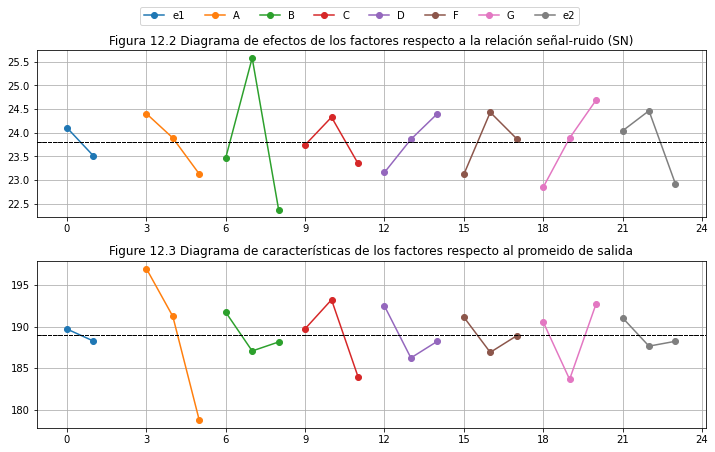

In [8]:
# Transformación de datos
df_long = df4.reset_index().melt(id_vars='index', var_name='Factor', value_name='SN')
df_long2 = df5.reset_index().melt(id_vars='index', var_name='Factor', value_name='ave')

# Creación de gráficos
fig, axs = plt.subplots(2,1,figsize=(10, 6))

# Gráfico por cada elemento
for factor in df_long['Factor'].unique():
    subset = df_long[df_long['Factor'] == factor]
    axs[0].plot(subset.index, subset['SN'], marker='o', linestyle='-', label=factor)
    axs[0].axhline(y=ave_SN, color='k', linestyle='--', linewidth=1)
    axs[0].xaxis.set_major_locator(plt.MultipleLocator(3))
    axs[0].set_title('Figura 12.2 Diagrama de efectos de los factores respecto a la relación señal-ruido (SN)')
    axs[0].grid(True)

for factor in df_long2['Factor'].unique():
    subset = df_long2[df_long2['Factor'] == factor]
    axs[1].plot(subset.index, subset['ave'], marker='o', linestyle='-')
    axs[1].axhline(y=ave_ave, color='k', linestyle='--', linewidth=1)
    axs[1].xaxis.set_major_locator(plt.MultipleLocator(3))
    axs[1].set_title('Figure 12.3 Diagrama de características de los factores respecto al promeido de salida')
    axs[1].grid(True)

axs[0].legend().remove()
fig.legend(loc="upper center", ncol=8, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


El factor que más influye en la variabilidad es B, ya que la diferencia en el promedio de los niveles de la relación S/N es la más grande.

El factor más adecuado para ajustar al valor objetivo es el factor A, ya que tiene la mayor diferencia en el promedio de salida.



## 12-03 Diseño de parámetros para características dinámicas

### 1. Diseño de parámetros para características dinámicas

La característica dinámica se refiere a la propiedad en la que el valor de salida cambia en respuesta a las variaciones en el valor de entrada. En general, la mayoría de las tecnologías, productos, equipos de fabricación y procesos de producción tienen características dinámicas que involucran entradas y salidas.
* Es necesario realizar un diseño en dos etapas para evitar que se vea afectado por el ruido dentro del rango de entrada.
* Función ideal
* Ecuación de proporcionalidad en el punto cero
* Ecuación de primer grado
* Ecuación de proporcionalidad en el punto de referencia

### 2. Procedimiento para el diseño de parámetros de características dinámicas

Paso 1: Establecimiento del método de evaluación de los factores de error y la variabilidad de la salida.

Paso 2: Configuración de los niveles de los parámetros de diseño (factores de control) y disposición del experimento.

Paso 3: Cuantificación de la variabilidad de la salida y cálculo de la relación señal-ruido (SN)

## 12.2

溶接機の溶接条件を最適化するため、信号因子として電流値を0.14kA, 0.15kA, 0.16kAの3水準、誤差因子として材料特性の3水準を外側に割り付けたL18直交表実験を行い、溶け込み量(mm)を計測した。ある実験Noの結果を表12.8に示す。動特性のSN比と感度を求めよ。


Para optimizar las condiciones de soldadura de una máquina de soldar, se realizó un experimento utilizando un diseño ortogonal L18, asignando como factor de señal tres niveles de corriente: 0.14kA, 0.15kA y 0.16kA, y como factor de error tres niveles de las características del material, distribuidos en el exterior. Se midió la cantidad de penetración (mm). Los resultados de un experimento en particular se muestran en la Tabla 12.8. Calcule la relación señal-ruido (SN) y la sensibilidad de las características dinámicas.


In [9]:
import numpy as np

# Datos experimentales (N1, N2, N3)
data = {
    'N1': [5.2, 6.3, 8.3],
    'N2': [6.8, 7.2, 9.5],
    'N3': [8.2, 9.8, 11.4]
}

# Factor de señal (M1, M2, M3)
signal_factors = {'M1': 0.14, 'M2': 0.15, 'M3': 0.16}

# Configuración del número de repeticiones r0
r0 = 1

# Número de niveles del factor de error
n = len(data['N1'])

# Número de niveles del factor de señal
k = len(signal_factors)

# Cálculod de la variación total ST
def calculate_total_variance(data):
    ST = sum(np.sum(np.square(values)) for values in data.values())
    return ST

ST = calculate_total_variance(data)
print(f"\nVariación total (ST): {ST:.2f}")


# Cálculo del efecto lineal（L1, L2, L3）
def calculate_linear_effect(signal_factors, data):
    signal_array = np.array(list(signal_factors.values()))
    return np.array([np.sum(np.array(data[key]) * signal_array) for key in ['N1', 'N2', 'N3']])

L_values = calculate_linear_effect(signal_factors, data)
print(f"\nEfecto lineal (L1): {L_values[0]:.3f}")
print(f"Efecto lineal (L2): {L_values[1]:.3f}")
print(f"Efecto lineal (L3): {L_values[2]:.3f}")

# Cálculo del orden efectivo r
sum_Mi_squared = sum(M**2 for M in signal_factors.values())
sum_Mi = sum(signal_factors.values())
r = sum_Mi_squared * n * r0
print("\nOrden efectivo r:", r)

# Cálculo del efecto de entrada Sβ
S_beta = np.square(sum(L_values)) / r
print(f"Efecto de entrada Sβ: {S_beta:.3f}")

# Cálculo del efecto del factor de error de formulación SβxN
S_beta_N = sum(L**2 for L in L_values)*(n * r0 / r) - S_beta
print(f"Efecto del factor de error de formulación Sβ×N: {S_beta_N:.3f}")

# Cálculo de la variabilidad del error S_e
S_e = ST - S_beta - S_beta_N
print(f"\nVariabilidad del error S_e: {S_e:.3f}")

# Cálculo de la varianza del error V_e
V_e = S_e / (r0*n*k -n)
print(f"Varianza del error V_e: {V_e:.3f}")

# Cálculo de la varianza del error S_Nの
S_N = ST - S_beta
print(f"\nVarianza del error S_N: {S_N:.3f}")

# Cálculo de la varianza total del error V_Nの計算
V_N = S_N / (r0*n*k -1)
print(f"Varianza total del error V_N: {V_N:.3f}")

# Cálculo de la relación SN
eta = 10*np.log10((S_beta - V_e)/(r*V_N))
print(f"\nRelación SN eta: {eta:.1f} (dB)")

# Cálculo de la sensibilidad ｓ
S = 10*np.log10((S_beta -V_e)/r)
print(f"Sensibilidad S: {S:.1f} (dB)")



Variación total (ST): 617.19

Efecto lineal (L1): 3.001
Efecto lineal (L2): 3.552
Efecto lineal (L3): 4.442

Orden efectivo r: 0.2031
Efecto de entrada Sβ: 595.224
Efecto del factor de error de formulación Sβ×N: 15.619

Variabilidad del error S_e: 6.347
Varianza del error V_e: 1.058

Varianza del error S_N: 21.966
Varianza total del error V_N: 2.746

Relación SN eta: 30.3 (dB)
Sensibilidad S: 34.7 (dB)


$ \hat{\eta} = 10log \frac{\hat{\beta}}{\hat{\sigma}} = 10log\frac{(S_{\beta} - V_{\epsilon})/r}{V_N}$

$ r = r_0 n \sum_{j=1}^k M_j^2 $

$ r = (k \times n) / (k + n -1) $

In [10]:
notebook_name = 'QCKentei1-12.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}

[NbConvertApp] Converting notebook QCKentei1-12.ipynb to html
[NbConvertApp] Writing 701786 bytes to QCKentei1-12.html
